Importing the necessary packages

In [ ]:
! pip install kaggle

In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.28G/2.29G [00:10<00:00, 253MB/s]
100% 2.29G/2.29G [00:10<00:00, 235MB/s]


In [ ]:
! unzip chest-xray-pneumonia.zip

In [6]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [7]:
import os
import shutil
import tensorflow as tf
import keras
import pickle
import random
import numpy as np

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import Sequence

from tensorflow.keras.applications.densenet import decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [8]:
import os
import re
import cv2
import keras
import skimage

import numpy as np
from tqdm import tqdm
from pathlib import Path

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dropout, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical
from keras import backend as K

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import math

from keras.models import load_model

from keras.applications.inception_v3 import preprocess_input as incep_preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

from keras.callbacks import ModelCheckpoint
from keras.layers import Flatten, Dense, BatchNormalization, Dropout

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

import tensorflow as tf

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [10]:
from __future__ import print_function

from time import time
import keras
from keras.datasets import mnist,cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
import random

In [11]:
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras import layers
from keras.layers import Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)


In [13]:
train_dir = "/content/chest_xray/train"
test_dir = "/content/chest_xray/test"
val_dir = "/content/chest_xray/val"

In [14]:
# Flow training images in batches using the generator 
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=5)
val_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=5)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size =5)

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
train_sample = train_generator.n
val_sample = val_generator.n
test_sample = test_generator.n

In [16]:
def plot_images(path, labeled=False, max_images=6):
  amount = 0
  fig = plt.figure(figsize=(12, 6))

  for file in os.listdir(path):
    if file.endswith('.jpeg'):
      if amount == max_images:
        break

      img = mpimg.imread(os.path.join(path, file))
      plt.subplot(231+amount)
      if labeled:
        plt.title(file.split('_')[1])
      imgplot = plt.imshow(img)

      amount += 1

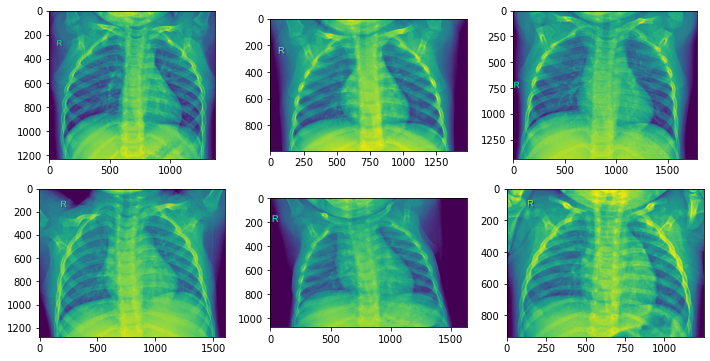

In [17]:
plot_images(train_dir + '/NORMAL')

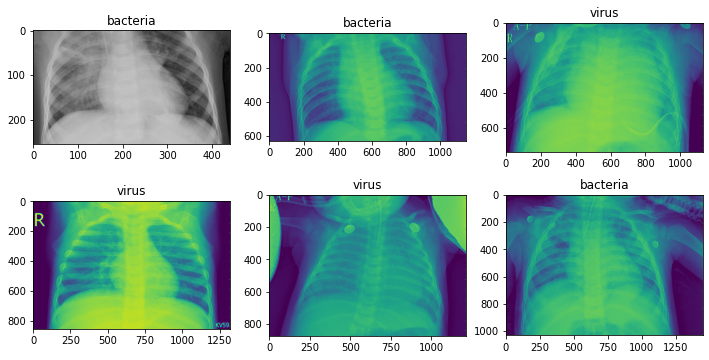

In [18]:
plot_images(train_dir + '/PNEUMONIA', labeled=True)

NORMAL


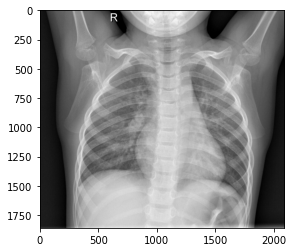

In [19]:
# Display Normal chest x-ray image
img_normal = load_img('/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
print('NORMAL')
plt.imshow(img_normal)
plt.show()

PNEUMONIA


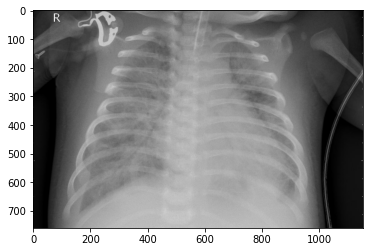

In [20]:
# Display Pneumonia chest x-ray image
img_pneumonia = load_img('/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

In [21]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

In [22]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [23]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87924736/87910968 [==============================] - 0s 0us/step


In [24]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [26]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [27]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( val_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [28]:
callbacks = myCallback()
history = model.fit_generator(
            train_generator,
            validation_data = val_generator,
            steps_per_epoch = 10,
            epochs = 10,
            validation_steps = 50,
            verbose = 2,
            callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/10
10/10 - 34s - loss: 7.6564 - acc: 0.6350 - val_loss: 2.8066 - val_acc: 0.5000 - 34s/epoch - 3s/step
Epoch 2/10
10/10 - 26s - loss: 0.7906 - acc: 0.8163 - val_loss: 2.6520 - val_acc: 0.5000 - 26s/epoch - 3s/step
Epoch 3/10
10/10 - 27s - loss: 0.9611 - acc: 0.7800 - val_loss: 9.3748 - val_acc: 0.5000 - 27s/epoch - 3s/step
Epoch 4/10
10/10 - 27s - loss: 1.0726 - acc: 0.7950 - val_loss: 3.6858 - val_acc: 0.5000 - 27s/epoch - 3s/step
Epoch 5/10
10/10 - 26s - loss: 0.8098 - acc: 0.7850 - val_loss: 2.2442 - val_acc: 0.5000 - 26s/epoch - 3s/step
Epoch 6/10
10/10 - 26s - loss: 0.4002 - acc: 0.8800 - val_loss: 4.4587 - val_acc: 0.5000 - 26s/epoch - 3s/step
Epoch 7/10
10/10 - 26s - loss: 0.8359 - acc: 0.8000 - val_loss: 2.1958 - val_acc: 0.5000 - 26s/epoch - 3s/step
Epoch 8/10
10/10 - 26s - loss: 0.5649 - acc: 0.7806 - val_loss: 2.9017 - val_acc: 0.5000 - 26s/epoch - 3s/step
Epoch 9/10
10/10 - 27s - loss: 0.6123 - acc: 0.8000 - val_loss: 2.4468 - val_acc: 0.5000 - 27s/epoch - 3s/step
E

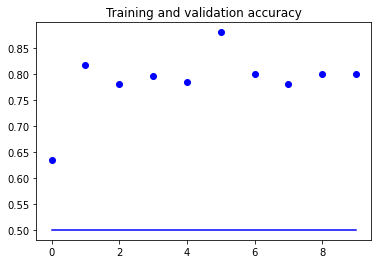

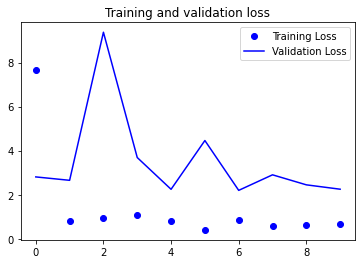

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

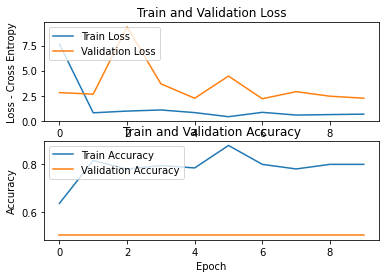

In [30]:
def graphs_learning_display(history):
    
    # Train and Test Loss
    plt.subplot(2,1,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(loc='upper left')
    plt.xlabel('Epoch')
    plt.ylabel('Loss - Cross Entropy')
    plt.title('Train and Validation Loss')
    
    # Train and Test Accuracy
    plt.subplot(2,1,2)
    plt.plot(history.history['acc'], label='Train Accuracy')
    plt.plot(history.history['val_acc'], label='Validation Accuracy')
    plt.legend(loc='upper left')
    plt.xlabel('Epoch'),
    plt.ylabel('Accuracy')
    plt.title('Train and Validation Accuracy')
    
    plt.show()
    

graphs_learning_display(history)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

      NORMAL       0.38      1.00      0.55       234
   PNEUMONIA       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


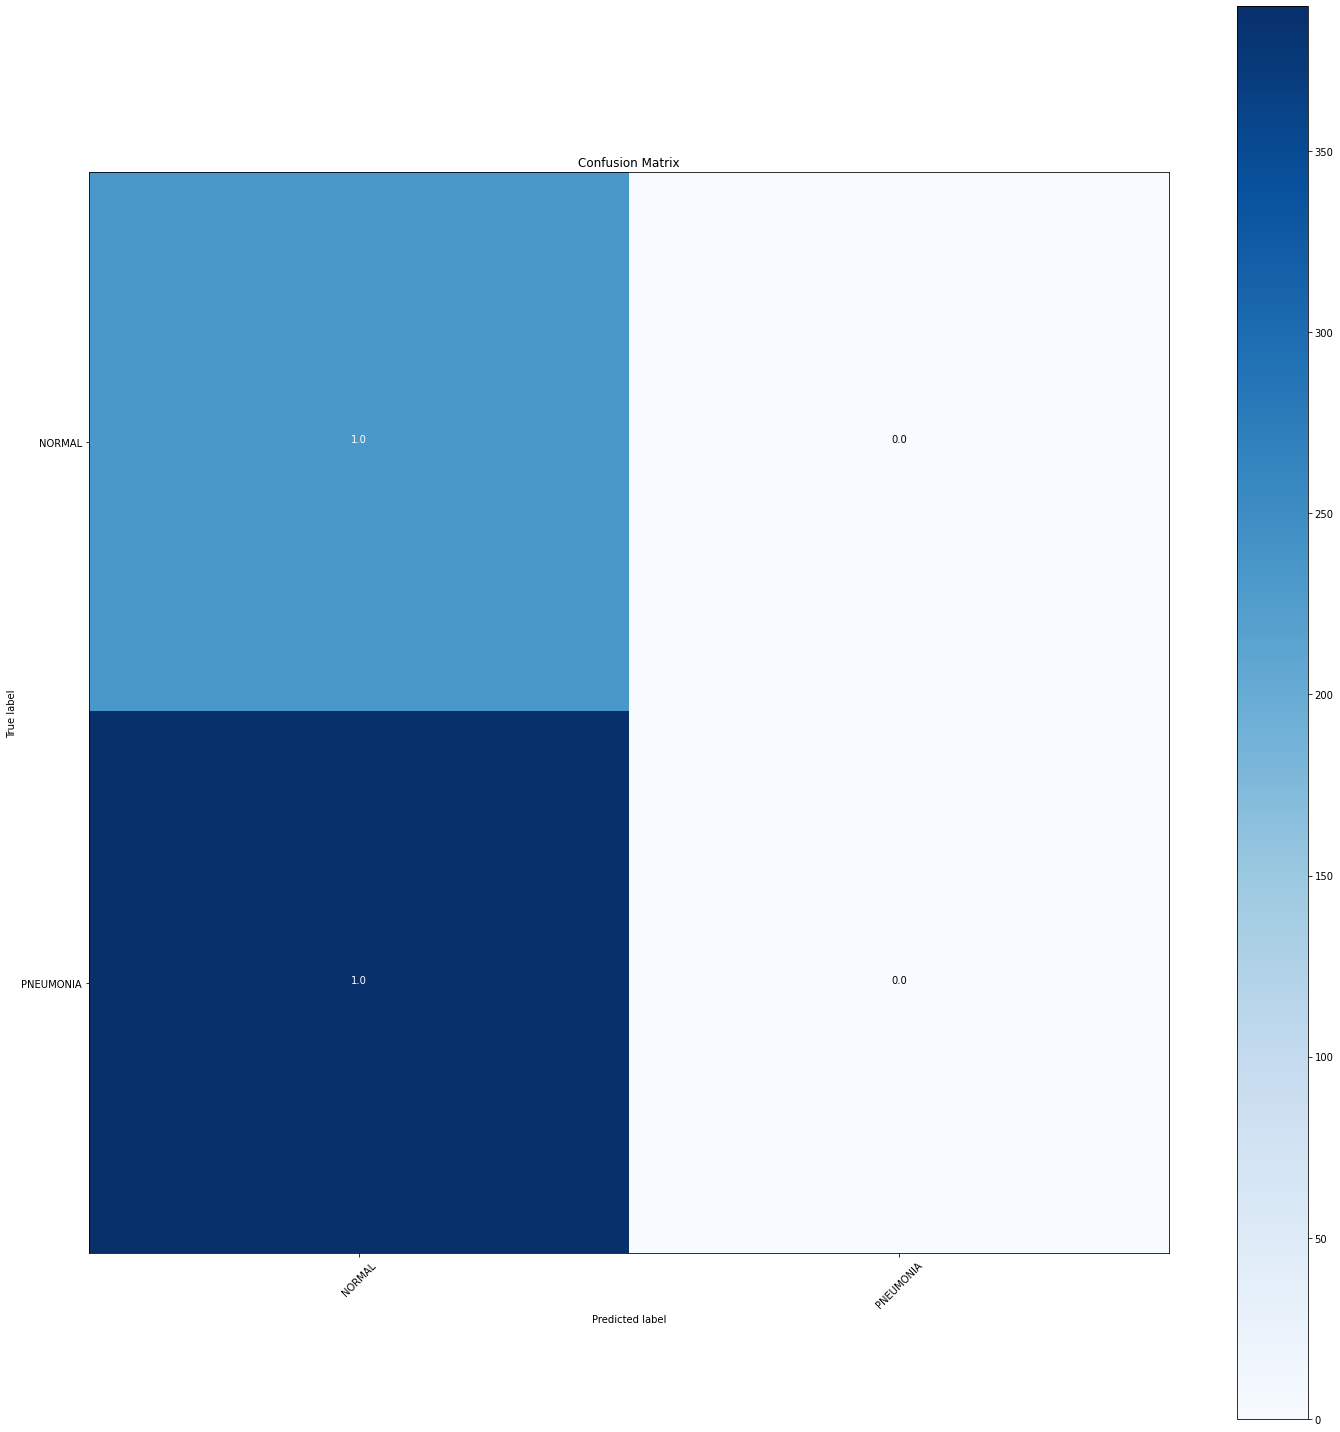

In [38]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))